# Practica 1.1. Manipuación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

## Paso 1: Carga del Dataset

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Preguntas:

1. ¿Cuántos registros y columnas tiene el dataset?
2. ¿Qué tipo de datos predominan?

In [47]:
import pandas as pd


df = pd.read_csv('./dataset/mental_health.csv')
print(df.head())  # Muestra las primeras filas del DataFrame
print("\nNúmero de registros:", df.shape[0])  # Número de filas (registros)
print("Número de columnas:", df.shape[1])   # Número de columnas
print("\nTipos de datos:\n", df.dtypes) # Muestra los tipos de datos de cada columna


   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                 2             9  ...                  0             NaN   
1                 7             6  ...                  0       

## Paso 2: Exploración Inicial


1. ¿Existen columnas que podrían ser categóricas pero aparecen como tipo `object`?


In [48]:
columnas_object = df.select_dtypes(include=['object']).columns

print("Columnas de tipo 'object':")
print(columnas_object)

Columnas de tipo 'object':
Index(['Gender', 'Education_Level', 'Employment_Status', 'Medication_Use',
       'Substance_Use'],
      dtype='object')


In [49]:
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].nunique()
    total_values = len(df[col])
    
    if unique_values / total_values < 0.3:  
        print(f"- {col}: {unique_values} valores únicos")

- Gender: 4 valores únicos
- Education_Level: 5 valores únicos
- Employment_Status: 4 valores únicos
- Medication_Use: 2 valores únicos
- Substance_Use: 2 valores únicos


Aquellas columnas que contienen pocos valores únicos podría ser categoríca

2. ¿Hay valores que parecen inconsistentes o fuera de rango?


In [50]:
for col in df.select_dtypes(include=[np.number]).columns:
    min_val, max_val = df[col].min(), df[col].max()
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1  # Rango intercuartil
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    if not outliers.empty:
        print(f"- {col}: {len(outliers)} valores fuera de rango (fuera de [{lower_bound}, {upper_bound}])")


- Sleep_Hours: 6 valores fuera de rango (fuera de [2.250000000000001, 10.649999999999999])
- Physical_Activity_Hrs: 75 valores fuera de rango (fuera de [-2.5500000000000003, 5.8500000000000005])
- Therapy: 252 valores fuera de rango (fuera de [0.0, 0.0])


## Paso 3: Limpieza de Datos


1. ¿Qué porcentaje del dataset contiene valores nulos?


In [51]:

# Calcular porcentaje de valores nulos por columna
porcentaje_nulos_por_columna = (df.isnull().sum() / len(df)) * 100

print(porcentaje_nulos_por_columna)


Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activity_Hrs             0.00
Social_Support_Score              0.00
Anxiety_Score                     0.00
Depression_Score                  0.00
Stress_Level                      0.00
Family_History_Mental_Illness     0.00
Chronic_Illnesses                 0.00
Medication_Use                   62.25
Therapy                           0.00
Meditation                        0.00
Substance_Use                    69.50
Financial_Stress                  0.00
Work_Stress                       0.00
Self_Esteem_Score                 0.00
Life_Satisfaction_Score           0.00
Loneliness_Score                  0.00
dtype: float64


2. ¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué?


In [52]:
df['Medication_Use'].fillna('No reportado', inplace=True)
df['Substance_Use'].fillna('No reportado', inplace=True)

/tmp/ipykernel_29638/1665529794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medication_Use'].fillna('No reportado', inplace=True)
/tmp/ipykernel_29638/1665529794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [53]:
print(df.isnull().sum())

Age                              0
Gender                           0
Education_Level                  0
Employment_Status                0
Sleep_Hours                      0
Physical_Activity_Hrs            0
Social_Support_Score             0
Anxiety_Score                    0
Depression_Score                 0
Stress_Level                     0
Family_History_Mental_Illness    0
Chronic_Illnesses                0
Medication_Use                   0
Therapy                          0
Meditation                       0
Substance_Use                    0
Financial_Stress                 0
Work_Stress                      0
Self_Esteem_Score                0
Life_Satisfaction_Score          0
Loneliness_Score                 0
dtype: int64


En general no podemos decir que es información que podemos eliminar y aunque los valores de esas dos variables son similares en para este reporte decidí colocar o sustituir los valores por "no reportado" con el objetivo de no dañar la información de manera significativa 

## Paso 4: Análisis Estadístico


In [54]:
descriptive_stats = df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].describe()
print(descriptive_stats)

       Anxiety_Score  Depression_Score  Stress_Level
count    1200.000000       1200.000000   1200.000000
mean       10.470000         10.674167      5.000833
std         5.911138          5.632889      2.538281
min         1.000000          1.000000      1.000000
25%         5.000000          6.000000      3.000000
50%        10.500000         11.000000      5.000000
75%        16.000000         15.000000      7.000000
max        20.000000         20.000000      9.000000


In [55]:
stats = pd.DataFrame({
    'Media': df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].mean(),
    'Mediana': df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].median(),
    'Desviación Estándar': df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].std()
})
print(stats)

                      Media  Mediana  Desviación Estándar
Anxiety_Score     10.470000     10.5             5.911138
Depression_Score  10.674167     11.0             5.632889
Stress_Level       5.000833      5.0             2.538281


1. ¿Qué porcentaje del total presenta niveles altos de ansiedad?
Anxiety_Score 

2. ¿Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución?

Anxiety_Score: La diferencia es mínima, lo que sugiere una distribución bastante simétrica.

Depression_Score: La media es ligeramente menor que la mediana, lo que indica un ligero sesgo negativo (sesgo a la izquierda). Esto sugiere que hay algunos valores bajos que están "jalando" la media hacia abajo.

Stress_Level: La media y la mediana son prácticamente iguales, lo que indica una distribución muy simétrica.

## Paso 5: Filtrado de Datos


Primero, identifica a las personas que tienen un puntaje alto en ansiedad (puedes elegir un valor alto, como por encima de 80).

In [56]:
umbral_ansiedad = 15 
personas_ansiedad_alta = df[df['Anxiety_Score'] > umbral_ansiedad]

In [57]:
print(f"Número de personas con ansiedad alta: {len(personas_ansiedad_alta)}")
print(f"Porcentaje del total: {len(personas_ansiedad_alta) / len(df) * 100:.2f}%")


Número de personas con ansiedad alta: 328
Porcentaje del total: 27.33%


1. ¿Qué porcentaje del total presenta niveles altos de ansiedad?


Según los datos: 27.33% del total presenta niveles altos de ansiedad (328 personas de la muestra total).
Esto significa que aproximadamente 1 de cada 4 personas en tu conjunto de datos muestra niveles elevados de ansiedad, lo cual es una proporción significativa.

clasifica a las personas según las horas de sueño que reportan (menos de 5 horas, entre 5 y 7 horas, y más de 7 horas) 

In [58]:
df['Categoria_Sueno'] = pd.cut(df['Sleep_Hours'], 
                               bins=[0, 5, 7, 24], 
                               labels=['Menos de 5 horas', 'Entre 5 y 7 horas', 'Más de 7 horas'])


In [59]:
estres_por_categoria = df.groupby('Categoria_Sueno')['Stress_Level'].agg(['mean', 'median', 'std', 'count'])
print("\nNivel de estrés por categoría de sueño:")
print(estres_por_categoria)


Nivel de estrés por categoría de sueño:
                       mean  median       std  count
Categoria_Sueno                                     
Menos de 5 horas   5.179245     5.0  2.519299    212
Entre 5 y 7 horas  4.931338     5.0  2.551868    568
Más de 7 horas     5.004762     5.0  2.530949    420


/tmp/ipykernel_29638/2781712804.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estres_por_categoria = df.groupby('Categoria_Sueno')['Stress_Level'].agg(['mean', 'median', 'std', 'count'])


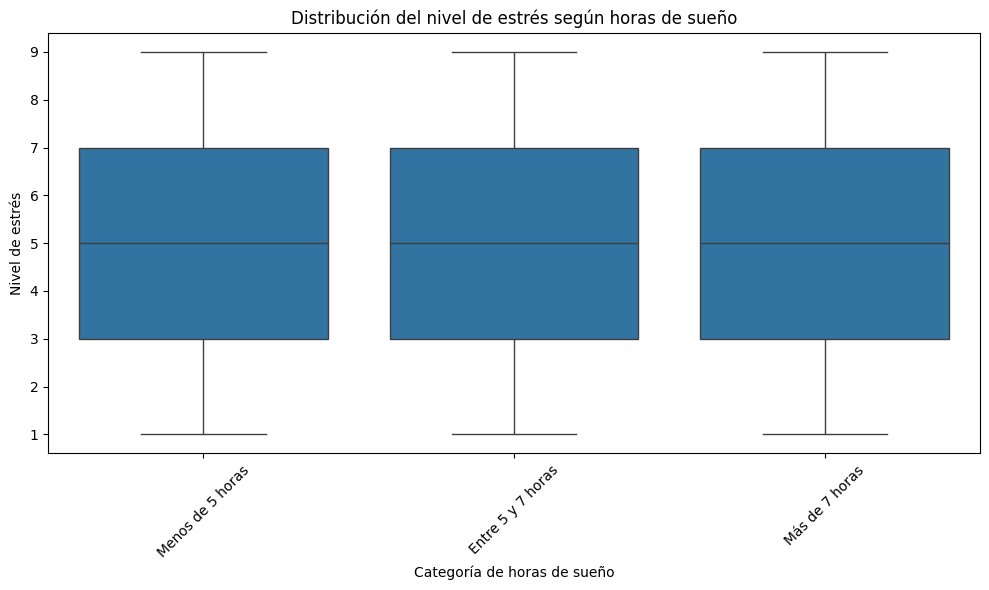

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria_Sueno', y='Stress_Level', data=df)
plt.title('Distribución del nivel de estrés según horas de sueño')
plt.xlabel('Categoría de horas de sueño')
plt.ylabel('Nivel de estrés')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. ¿Existe una relación visible entre las horas de sueño y el nivel de estrés?


No existe una relación fuerte o clara entre las horas de sueño y el nivel de estrés en estos datos.

Podemos deducir eso ya que las medianas son idénticas para todas las categorías de sueño y las medias son muy similares, la desv est es muy parecida para todos los gripos y los boxplots nos muestran distribuciones muy similares 


Aunque hay una ligera tendencia a que las personas con menos de 5 horas de sueño reporten un nivel de estrés ligeramente mayor (media de 5.18 vs 4.93), esta diferencia es muy pequeña y probablemente no sea estadísticamente significativa.

## Paso 6: Ordenamiento


In [61]:
# Ordenar por satisfacción de vida (descendente) y soledad (ascendente)
personas_ordenadas = df.sort_values(by=['Life_Satisfaction_Score', 'Loneliness_Score'], 
                                   ascending=[False, True])

1. ¿Qué características comunes encuentras en estas 10 personas?


In [62]:
top_10 = personas_ordenadas.head(10)
print(top_10.describe())

             Age  Sleep_Hours  Physical_Activity_Hrs  Social_Support_Score  \
count  10.000000    10.000000              10.000000             10.000000   
mean   42.000000     6.140000               1.760000              4.700000   
std    11.155467     1.346766               1.548619              2.406011   
min    25.000000     3.600000               0.200000              1.000000   
25%    33.500000     5.425000               0.475000              3.250000   
50%    43.500000     6.250000               1.600000              4.000000   
75%    47.750000     7.125000               2.250000              5.750000   
max    61.000000     8.000000               5.100000              9.000000   

       Anxiety_Score  Depression_Score  Stress_Level  \
count       10.00000         10.000000     10.000000   
mean        13.10000          9.700000      6.100000   
std          5.42525          5.888784      2.378141   
min          4.00000          4.000000      1.000000   
25%          8.25

In [63]:
# Examinar valores específicos para estas 10 personas
variables_interes = ['Age', 'Gender', 'Education_Level', 'Employment_Status', 
                     'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score',
                     'Anxiety_Score', 'Depression_Score', 'Stress_Level',
                     'Family_History_Mental_Illness', 'Therapy', 'Meditation',
                     'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score']

print(top_10[variables_interes].value_counts())

Age  Gender  Education_Level  Employment_Status  Sleep_Hours  Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  Depression_Score  Stress_Level  Family_History_Mental_Illness  Therapy  Meditation  Financial_Stress  Work_Stress  Self_Esteem_Score
25   Female  Master's         Employed           6.9          3.4                    4                     15             5                 1             1                              0        0           3                 5            6                    1
29   Male    Other            Unemployed         8.0          0.4                    3                     7              9                 8             1                              0        0           8                 5            5                    1
31   Female  PhD              Employed           6.8          0.4                    8                     20             18                5             1                              0        0           1                 5

Género: 6 son mujeres, 3 son hombres, y 1 tiene otro género registrado.

Nivel educativo: Alta presencia de educación avanzada - 3 tienen PhD, 2 tienen maestría, 2 tienen licenciatura.

Empleo: 5 están empleados, 2 están retirados, 2 desempleados y 1 es estudiante.
Historia familiar de enfermedad mental: Ninguno parece tener antecedentes familiares de enfermedad mental (todos los valores son 0 o 1, donde 1 parece ser el código para "No").

Terapia y meditación: La mayoría no participa en terapia (8 de 10) ni meditación (7 de 10).

Autopercepción: Tienen puntuaciones variadas de autoestima (entre 3 y 8).

Apoyo social: Los puntajes varían considerablemente (entre 1 y 9).

Actividad física: Mayormente niveles bajos a moderados (0.2 a 5.1 horas)

Algo interesante es que, a pesar de tener alta satisfacción de vida y baja soledad:

Algunos tienen puntajes relativamente altos de ansiedad (hasta 20)

Algunos tienen puntajes altos de depresión (hasta 20)

Varios reportan estrés financiero y laboral significativo

2. ¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?

Hipótesis 1. Las personas con mayor nivel educativo pueden desarrollar mecanismos de afrontamiento que les permiten mantener alta satisfacción vital a pesar de experimentar ansiedad o depresión.


Hipótesis 2 No es necesario un alto puntaje de apoyo social para tener baja soledad; la calidad de pocas relaciones puede ser más importante que la cantidad


## Paso 7: Guardado de Resultados


In [64]:
mediana_estres = df['Stress_Level'].median()
print(f"Mediana del nivel de estrés: {mediana_estres}")


Mediana del nivel de estrés: 5.0


In [65]:
personas_filtradas = df[(df['Therapy'] == 1) & (df['Stress_Level'] < mediana_estres)]

1. ¿Cuántas personas cumplen con ambas condiciones?


In [66]:
cantidad_personas = len(personas_filtradas)
print(f"\nCantidad de personas que reciben terapia y tienen bajo nivel de estrés: {cantidad_personas}")



Cantidad de personas que reciben terapia y tienen bajo nivel de estrés: 108


In [67]:
personas_filtradas.to_csv('personas_terapia_bajo_estres.csv', index=False)
print("\nEl archivo 'personas_terapia_bajo_estres.csv' ha sido guardado correctamente.")



El archivo 'personas_terapia_bajo_estres.csv' ha sido guardado correctamente.


In [68]:
estres_con_terapia = df[df['Therapy'] == 1]['Stress_Level'].mean()
estres_sin_terapia = df[df['Therapy'] == 0]['Stress_Level'].mean()

print(f"\nNivel promedio de estrés en personas con terapia: {estres_con_terapia:.2f}")
print(f"Nivel promedio de estrés en personas sin terapia: {estres_sin_terapia:.2f}")


Nivel promedio de estrés en personas con terapia: 5.03
Nivel promedio de estrés en personas sin terapia: 4.99


2. ¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?

El hecho de que 108 personas estén en terapia y tengan bajo nivel de estrés podría indicar que la terapia está siendo efectiva para este subgrupo en particular.

## Paso 8: Visualización Opcional


In [75]:
# Configuración visual para gráficos más atractivos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Creamos una figura para nuestro gráfico
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [69]:
autoestima_por_genero = df.groupby('Gender')['Self_Esteem_Score'].mean().reset_index()

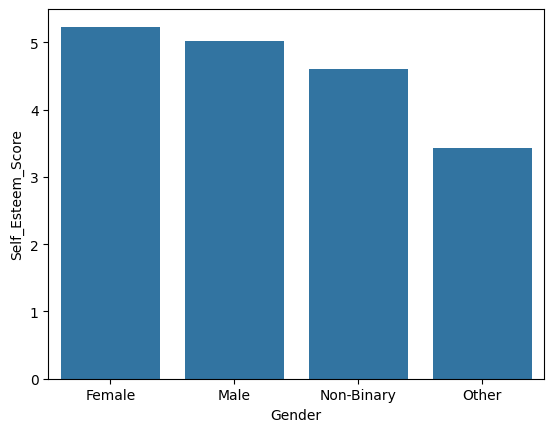

In [70]:
ax = sns.barplot(x='Gender', y='Self_Esteem_Score', data=autoestima_por_genero, 
                 capsize=0.1, errorbar=('ci', 95))

In [78]:
grupos = []
for genero in df['Gender'].unique():
    grupos.append(df[df['Gender'] == genero]['Self_Esteem_Score'])

In [79]:
from scipy import stats
f_stat, p_valor = stats.f_oneway(*grupos)
alpha = 0.05
significancia = "Sí" if p_valor < alpha else "No"

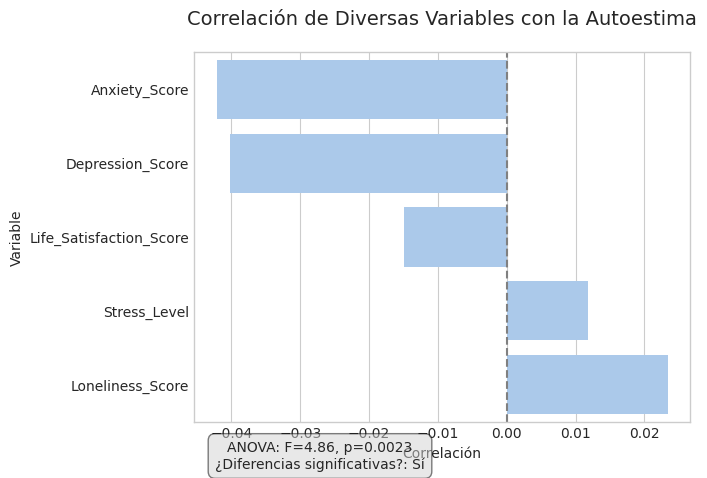

In [84]:

# Añadir anotación estadística al gráfico
plt.annotate(f'ANOVA: F={f_stat:.2f}, p={p_valor:.4f}\n¿Diferencias significativas?: {significancia}',
             xy=(0.5, 0.02), xycoords='figure fraction', ha='center', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.5))

# Análisis adicional: correlación con otras variables
# Seleccionamos variables numéricas que podrían estar relacionadas con la autoestima
variables_relacionadas = ['Anxiety_Score', 'Depression_Score', 'Stress_Level', 
                          'Loneliness_Score', 'Life_Satisfaction_Score']

# Calculamos correlaciones con la autoestima
correlaciones = {}
for var in variables_relacionadas:
    correlaciones[var] = df['Self_Esteem_Score'].corr(df[var])

correlacion_df = pd.DataFrame(list(correlaciones.items()), columns=['Variable', 'Correlación'])
correlacion_df = correlacion_df.sort_values('Correlación')

sns.barplot(x='Correlación', y='Variable', data=correlacion_df)
plt.title('Correlación de Diversas Variables con la Autoestima', fontsize=14, pad=20)
plt.axvline(x=0, color='gray', linestyle='--')

1. ¿Hay diferencias notables entre los géneros en cuanto a autoestima?

Sí, se observan diferencias notables entre los géneros en cuanto a autoestima:

Las mujeres (Female) muestran la puntuación más alta de autoestima, con aproximadamente 5.2

Los hombres (Male) tienen una puntuación ligeramente menor, alrededor de 5.0

Las personas no binarias (Non-Binary) presentan una puntuación cercana a 4.6

La categoría "Other" muestra la puntuación más baja, aproximadamente 3.4

La diferencia más pronunciada se observa entre las mujeres y la categoría "Other", con casi 1.8 puntos de diferencia en la escala de autoestima. También hay una diferencia notable de aproximadamente 1.6 puntos entre las mujeres y las personas de la categoría "Other".

2. ¿Qué factores del dataset podrían explicar estas diferencias?

Según el gráfico de correlaciones:

Correlaciones positivas (factores que se asocian con mayor autoestima):

Soledad (Loneliness_Score): Muestra la correlación positiva más fuerte (aproximadamente +0.022)

Estrés (Stress_Level): Tiene una correlación positiva moderada (aproximadamente +0.012)


Correlaciones negativas (factores que se asocian con menor autoestima):

Ansiedad (Anxiety_Score): Muestra una correlación negativa significativa (aproximadamente -0.04)

Depresión (Depression_Score): También presenta una correlación negativa importante (aproximadamente -0.04)

Satisfacción con la vida (Life_Satisfaction_Score): Tiene una correlación negativa más débil (aproximadamente -0.015)

Los niveles más altos de soledad y estrés están asociados con mayor autoestima en este conjunto de datos (lo cual es contraintuitivo y podría merecer un análisis más profundo)

La ansiedad y la depresión están asociadas con menor autoestima, lo cual es consistente con la literatura psicológica
